# 02. Explore Train/Test Sets

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

## Read data

In [66]:
db = pd.read_csv("../data/processed/balanced/test.csv")
db

,Shared_Markers,k0,k1,k2,Share_allele,Value,True_positive,Marcadores,Software,Datos,Kinship,File,Hoja,Sheet,Value_range,FAM_Sample_info_id,FAM_Sample_info_rel,VIC_Sample_info_id,VIC_Sample_info_rel
0,13,2,8,5,18,3.01881,False,15,BlindSearch,Simulados,Hermandad,15_BlindSearch_Simulados_Hermandad_allele,isib-175,175:575,0-99,52302,U,56701,S
1,13,2,7,6,19,3.42126,False,15,BlindSearch,Simulados,Hermandad,15_BlindSearch_Simulados_Hermandad_allele,isib-375,375:375,0-99,106502,U,69701,U
2,13,2,5,8,21,30.00000,False,15,ScreenMatch,Simulados,Hermandad,15_ScreenMatch_Simulados_Hermandad_allele,Process_LISIB-1,1:749,0-99,89702,S,101402,U
3,10,5,3,7,17,2.00000,False,15,ScreenMatch,Simulados,Hermandad,15_ScreenMatch_Simulados_Hermandad_allele,Process_lisib-375,375:375,0-99,4902,S,64202,S
4,12,3,6,6,18,200.00000,False,15,ScreenMatch,Simulados,Hermandad,15_ScreenMatch_Simulados_Hermandad_allele,Process_LISIB-1,1:749,100-999,29302,U,119202,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,14,1,5,9,23,46.38480,False,15,BlindSearch,Simulados,Hermandad,15_BlindSearch_Simulados_Hermandad_allele,isib-1,1:749,0-99,101802,U,12202,S
5041,11,4,2,9,20,10.00000,False,15,ScreenMatch,Simulados,Hermandad,15_ScreenMatch_Simulados_Hermandad_allele,Process_LISIB-1,1:749,0-99,101302,S,30502,S
5042,11,4,5,6,17,5.00000,False,15,ScreenMatch,Simulados,Hermandad,15_ScreenMatch_Simulados_Hermandad_allele,Process_LISIB-97,97:653,0-99,97102,U,64702,U
5043,14,1,6,8,22,1.00000,False,15,ScreenMatch,Simulados,Paternidad,15_ScreenMatch_Simulados_Paternidad_allele,Process_LIPI-1,1:749,0-99,47302,S,48602,S


In [67]:
db.FAM_Sample_info_id.apply(type).value_counts()

<class 'int'>    5045
Name: FAM_Sample_info_id, dtype: int64

In [68]:
db[db.FAM_Sample_info_id.apply(type) == int]

,Shared_Markers,k0,k1,k2,Share_allele,Value,True_positive,Marcadores,Software,Datos,Kinship,File,Hoja,Sheet,Value_range,FAM_Sample_info_id,FAM_Sample_info_rel,VIC_Sample_info_id,VIC_Sample_info_rel
0,13,2,8,5,18,3.01881,False,15,BlindSearch,Simulados,Hermandad,15_BlindSearch_Simulados_Hermandad_allele,isib-175,175:575,0-99,52302,U,56701,S
1,13,2,7,6,19,3.42126,False,15,BlindSearch,Simulados,Hermandad,15_BlindSearch_Simulados_Hermandad_allele,isib-375,375:375,0-99,106502,U,69701,U
2,13,2,5,8,21,30.00000,False,15,ScreenMatch,Simulados,Hermandad,15_ScreenMatch_Simulados_Hermandad_allele,Process_LISIB-1,1:749,0-99,89702,S,101402,U
3,10,5,3,7,17,2.00000,False,15,ScreenMatch,Simulados,Hermandad,15_ScreenMatch_Simulados_Hermandad_allele,Process_lisib-375,375:375,0-99,4902,S,64202,S
4,12,3,6,6,18,200.00000,False,15,ScreenMatch,Simulados,Hermandad,15_ScreenMatch_Simulados_Hermandad_allele,Process_LISIB-1,1:749,100-999,29302,U,119202,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,14,1,5,9,23,46.38480,False,15,BlindSearch,Simulados,Hermandad,15_BlindSearch_Simulados_Hermandad_allele,isib-1,1:749,0-99,101802,U,12202,S
5041,11,4,2,9,20,10.00000,False,15,ScreenMatch,Simulados,Hermandad,15_ScreenMatch_Simulados_Hermandad_allele,Process_LISIB-1,1:749,0-99,101302,S,30502,S
5042,11,4,5,6,17,5.00000,False,15,ScreenMatch,Simulados,Hermandad,15_ScreenMatch_Simulados_Hermandad_allele,Process_LISIB-97,97:653,0-99,97102,U,64702,U
5043,14,1,6,8,22,1.00000,False,15,ScreenMatch,Simulados,Paternidad,15_ScreenMatch_Simulados_Paternidad_allele,Process_LIPI-1,1:749,0-99,47302,S,48602,S


## Comprobar si Existen Registros Contradictorios

In [69]:
a = db[["Shared_Markers", "k0", "k1", "k2", "Share_allele", "True_positive"]].copy()
a = a.groupby(["Shared_Markers", "k0", "k1", "k2", "Share_allele"]).size().reset_index()

b = db[["Shared_Markers", "k0", "k1", "k2", "Share_allele", "True_positive"]].copy()
b = b.groupby(["Shared_Markers", "k0", "k1", "k2", "Share_allele"]).sum().reset_index()

In [70]:
result = pd.merge(a, b, on=["Shared_Markers", "k0", "k1", "k2", "Share_allele"], how='inner')
result.rename(columns = {0: 'count', 'True_positive': 'positives'}, inplace= True)

In [71]:
# Definir una función para crear la nueva columna
def calc_discrepancy(row):
  if row['positives'] == row['count']:
    return 0
  else:
    return min(row['positives'],
               row['count'] - row['positives'])

# Aplicar la función a cada fila
result['discrepancy'] = result.apply(calc_discrepancy, axis=1)
result

,Shared_Markers,k0,k1,k2,Share_allele,count,positives,discrepancy
0,8,7,0,8,16,1,0,0
1,8,7,1,7,15,1,0,0
2,8,7,2,6,14,1,0,0
3,8,7,3,5,13,2,0,0
4,9,6,1,8,17,8,0,0
...,...,...,...,...,...,...,...,...
65,15,0,9,6,21,30,4,4
66,15,0,10,5,20,19,2,2
67,15,0,11,4,19,9,1,1
68,15,0,12,3,18,4,0,0


Text(0, 0.5, 'Frecuencia')

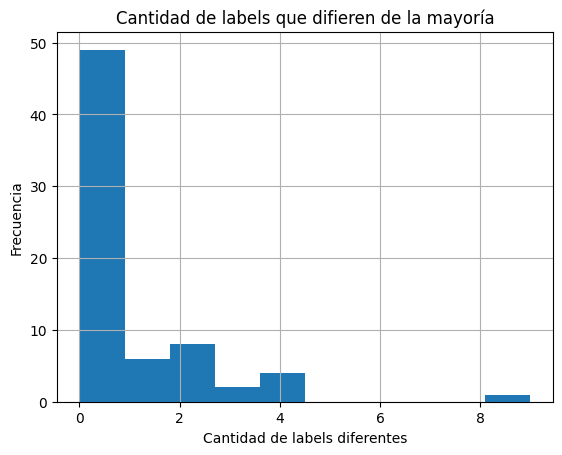

In [72]:
result["discrepancy"].hist()
plt.title("Cantidad de labels que difieren de la mayoría")
plt.xlabel("Cantidad de labels diferentes")
plt.ylabel("Frecuencia")

In [73]:
print(f"En total existen {sum(result['discrepancy'])} discrepancias en los datos.")

En total existen 53 discrepancias en los datos.


### Mostrar un Ejemplo de Registros Contradictorios

In [74]:
db[(db.k0 == 0) & (db.k1 == 8) & (db.k2 == 7)]

,Shared_Markers,k0,k1,k2,Share_allele,Value,True_positive,Marcadores,Software,Datos,Kinship,File,Hoja,Sheet,Value_range,FAM_Sample_info_id,FAM_Sample_info_rel,VIC_Sample_info_id,VIC_Sample_info_rel
129,15,0,8,7,22,6.853090e+01,False,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-1,1:749,0-99,107702,S,6302,S
852,15,0,8,7,22,2.278500e+03,False,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-175,175:575,1000-9999,43201,S,99302,S
1006,15,0,8,7,22,2.000000e+01,False,15,ScreenMatch,Simulados,Hermandad,15_ScreenMatch_Simulados_Hermandad_allele,Process_LISIB-1,1:749,0-99,45402,S,126502,S
1025,15,0,8,7,22,3.833960e+00,False,15,BlindSearch,Simulados,Hermandad,15_BlindSearch_Simulados_Hermandad_allele,isib-60,60:690,0-99,126201,S,88602,U
1345,15,0,8,7,22,5.617870e+05,True,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-97,97:653,100000-999999,102801,S,102801,F
1356,15,0,8,7,22,3.000000e+02,False,15,ScreenMatch,Simulados,Paternidad,15_ScreenMatch_Simulados_Paternidad_allele,Process_LIPI-1,1:749,100-999,32302,F,54002,S
1521,15,0,8,7,22,5.000000e+03,True,15,ScreenMatch,Simulados,Paternidad,15_ScreenMatch_Simulados_Paternidad_allele,Process_LIPI-175,175:575,1000-9999,20401,S,20401,F
1613,15,0,8,7,22,6.783020e+01,False,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-1,1:749,0-99,105302,S,93302,F
1826,15,0,8,7,22,4.475700e+04,True,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-375,375:375,10000-99999,106601,S,106601,F
2029,15,0,8,7,22,5.000000e+02,False,15,ScreenMatch,Simulados,Paternidad,15_ScreenMatch_Simulados_Paternidad_allele,Process_LIPI-7,7:743,100-999,95702,S,147101,F
